I have been reading Steven Koonin's *Unsettled: What Climate Science Tells Us, What It Doesn't, and Why It Matters* and although I don't agree with all of it, I think he makes an excellent point regarding how extreme temperatures are reported in the [2017 Climate Science Special Report](https://science2017.globalchange.gov/) (CSSR). For a quick background, the CSSR is, according to their website, an "authoritative assessment of the science of climate change, with a focus on the United States." The CSSR is one of the most important document regarding climate change, so it would be quite alarming if Koonin's claims were accurate.

He homes in on the claim that extreme temperatures are becoming more common. Everyone reading this is probably familiar with hearing that statement in the news, and for good reason. That statement is in many climate reports, including the 2017 CSSR. In particular, the CSSR makes the following claim in their [executive summary](https://science2017.globalchange.gov/chapter/executive-summary/):

> There have been marked changes in temperature extremes across the contiguous United States. The number of high temperature records set in the past two decades far exceeds the number of low temperature records. (Very high confidence) (Ch. 6, Fig. ES.5)

Figure ES.5 referenced in that statement is reproduced below.

![CSSR Figure 6.5](cssr_figure_6_5.png)

This plot certainly looks like it shows an increase in extreme temperatures, so how can this be false? Koonin explains it well:

> To see that, think about the second year (1931) of the analysis. On each of the year’s 365 days, each station that records a temperature even a degree higher than that of the year before will tally a “record high,” while those with a temperature lower will not. We’ll suppose that the CSSR used 1,400 stations (it doesn’t say exactly how many were used, but the 2016 analysis used 1,408); because of the low bar to a record and the random fluctuations of temperature variations, about half the stations will fall on either side of the previous year’s temperature, so that 255,500 record warms (365 × 1,400/2) will be tallied that year. Similarly, about the same number of record colds will be tallied, so that the ratio of record warms to record colds in 1931 (and in the years soon after) will be close to 1. Because these numbers are large (and will remain so in the early years), the ratio won’t vary much from 1:1 early in the period of observation. However, in later years, as the bar to a new record increases, the numbers of records become much smaller, and so the ratio fluctuates much more. The upshot is that by using the running records method, the ratio graph is guaranteed to show a long period of values around 1 at the start of the record, followed by dramatic variations toward the end, creating the impression of large changes in recent decades, even if they aren’t present. While it produces a scary visual, this ratio has almost nothing to do with how temperatures are actually changing.

I thought this was a really good point and would be simple to simulate this, so I did. I wanted to see what the plot would look like if there was **no** warming. Would we still see the same effect?

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def generate_num_extreme_vals(num_stations, num_years, random_seed=0, warming_per_year=0):
    """
    Generate the number of extremes (maximum high or minimum low) at each weather station
    """
    DAYS_PER_YEAR = 365
    new_max_vals_per_year = []
    new_min_vals_per_year = []
    num_measurements = num_stations * DAYS_PER_YEAR
    max_temps = [-float("inf")] * num_measurements
    min_temps = [float("inf")] * num_measurements
    for i in range(num_years):
        new_temps = np.random.normal(0, size=num_measurements) + i * warming_per_year
        num_max_vals_that_year = 0
        num_min_vals_that_year = 0
        for index, val in enumerate(new_temps):
            if val > max_temps[index]:
                num_max_vals_that_year += 1
                max_temps[index] = val
            if val < min_temps[index]:
                num_min_vals_that_year += 1
                min_temps[index] = val
        new_max_vals_per_year.append(num_max_vals_that_year)
        new_min_vals_per_year.append(num_min_vals_that_year)
    return new_max_vals_per_year, new_min_vals_per_year

In [3]:
max_vals, min_vals = generate_num_extreme_vals(1, 100)

I made a plot of the number of "extreme" temperatures per year. As you might imagine, this starts high and drops precipitately. And you can understand why it would be hard to see a change in the number of extreme temperatures in a graph like this, thus the reason for looking at the ratio.

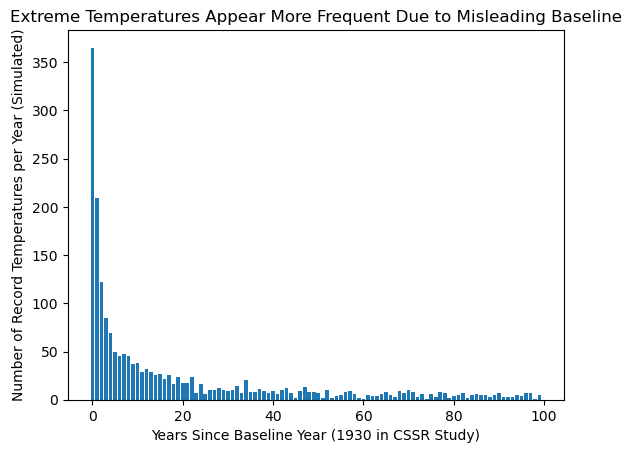

In [4]:
plt.bar(range(len(max_vals)), max_vals)
plt.title('Extreme Temperatures Appear More Frequent Due to Misleading Baseline')
plt.xlabel('Years Since Baseline Year (1930 in CSSR Study)')
plt.ylabel('Number of Record Temperatures per Year (Simulated)')
plt.show()

Remember, there are 1,408 measurements taken every day, so the number of record measurements could far exceed

I'm not sure what they do in the case where there are zero so to avoid a "division by zero" error I converted the zeros to ones. I don't believe this would significantly affect the results.

In [5]:
def get_ratio(max_vals, min_vals):
    cleaned_max = [max(x, 1) for x in max_vals]
    cleaned_min = [max(x, 1) for x in min_vals]
    ratio = []
    for index, extreme_vals in enumerate(zip(cleaned_max, cleaned_min)): # zip them!!!
        if extreme_vals[0] > extreme_vals[1]:
            ratio.append(extreme_vals[0] / extreme_vals[1])
        else:
            ratio.append(extreme_vals[1] / extreme_vals[0])
    return ratio

In [6]:
ratio = get_ratio(max_vals, min_vals)

In [7]:
def plot_ratio(ratio, num_stations=1):
    plt.bar(range(len(ratio)), ratio)
    title = f'Frequency of Extreme Temperatures for {num_stations} Weather Station'
    title += 's' if num_stations > 1 else ''
    plt.title(title)
    plt.xlabel('Years Since Baseline Year (1930 in CSSR Study)')
    plt.ylabel('Ratio of Daily Temperature Records (Simulated)')
    plt.ylim(0, 8)
    plt.show()

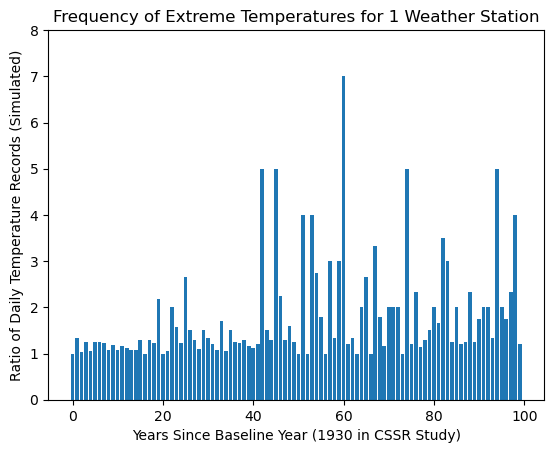

In [8]:
plot_ratio(ratio)

The effect Koonin was worried about does occur. The baseline rises even though there is no change in the underlying climate. I ran the experiment five more times to make sure I got the same results.

In [9]:
def run_experiment_with_seed(seed, num_stations=1, num_years=100, warming_per_year=0):
    max_vals, min_vals = generate_num_extreme_vals(num_stations, num_years, seed, warming_per_year=warming_per_year)
    ratio = get_ratio(max_vals, min_vals)
    plot_ratio(ratio, num_stations)

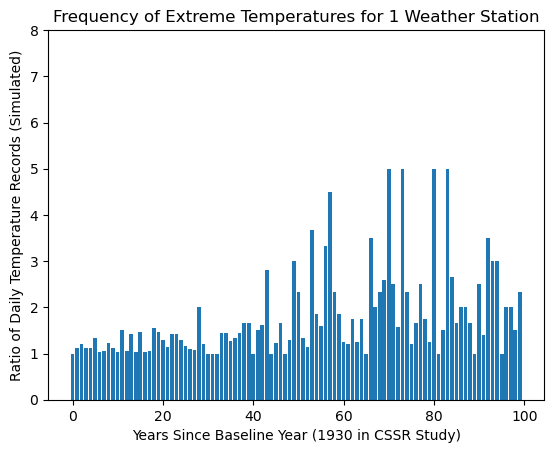

In [10]:
run_experiment_with_seed(1)

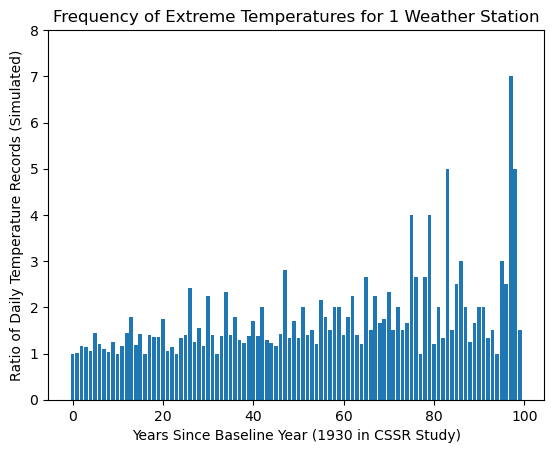

In [11]:
run_experiment_with_seed(2)

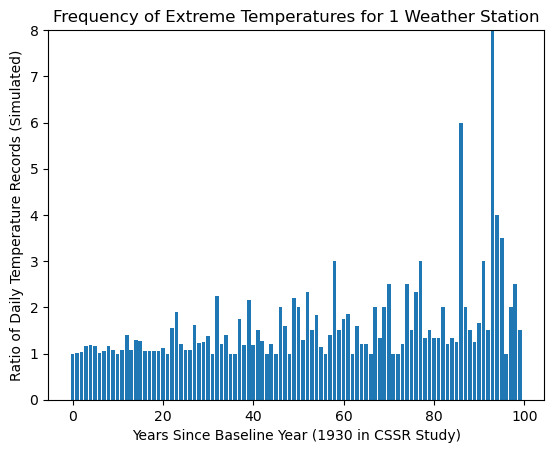

In [12]:
run_experiment_with_seed(3)

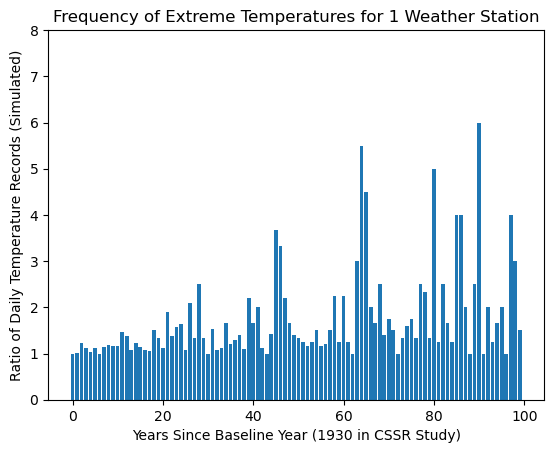

In [13]:
run_experiment_with_seed(4)

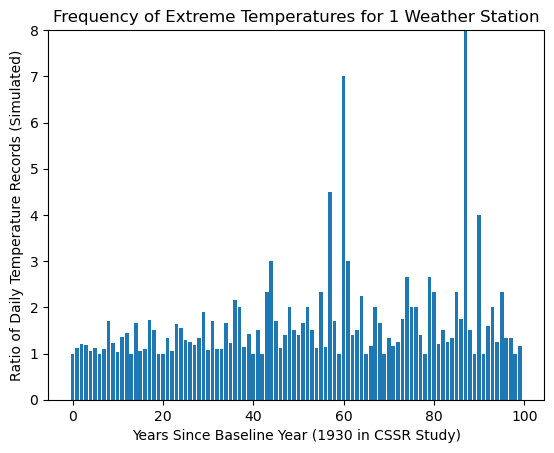

In [14]:
run_experiment_with_seed(5)

In all of them, the results are the same. In all of these, this plot seems to suggest more extreme weather events in the second half although there is no change in the average temperature.

However, Koonin believes that the original study used around 1,408 weather stations, not just one. So how does that affect the results? I reran the simulation to see.

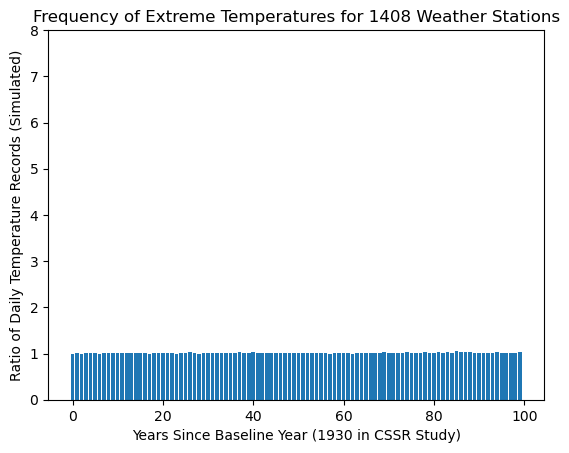

In [15]:
run_experiment_with_seed(1, num_stations=1408)

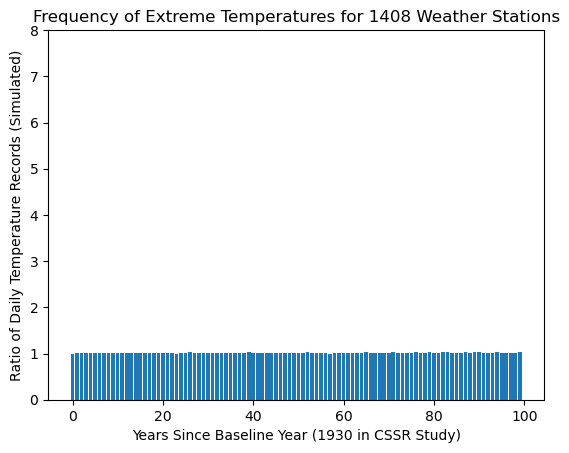

In [16]:
run_experiment_with_seed(2, num_stations=1408)

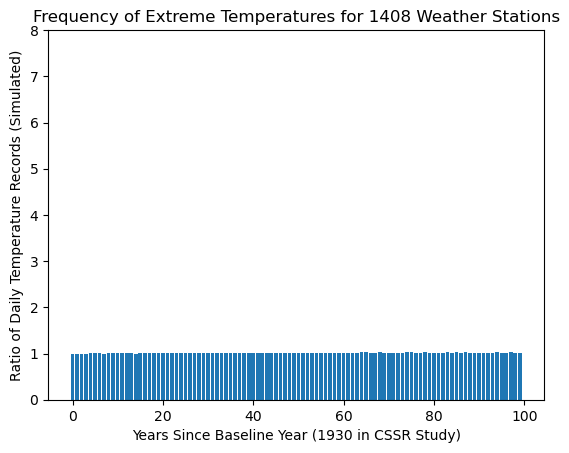

In [17]:
run_experiment_with_seed(3, num_stations=1408)

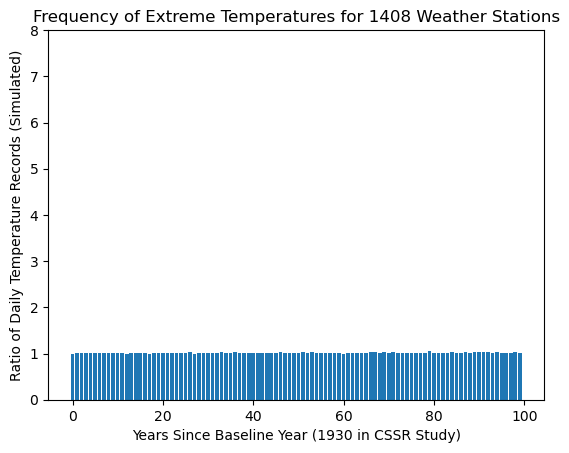

In [18]:
run_experiment_with_seed(4, num_stations=1408)

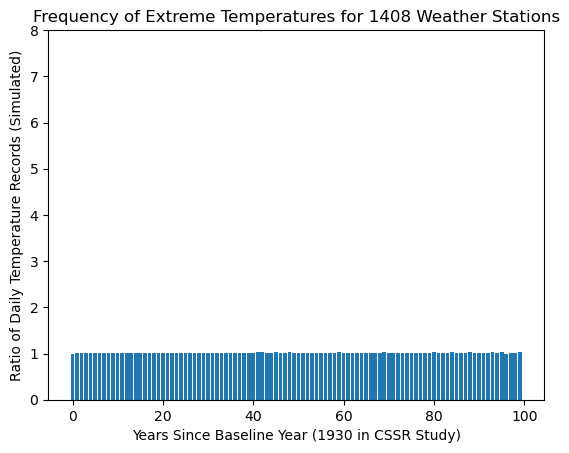

In [19]:
run_experiment_with_seed(5, num_stations=1408)

With so many weather stations, the effect doesn't look so strong anymore. However, given the large number of measurements my plot doesn't look anything like the plot in the climate report either. And I don't think that's just because the world is warming and my simulation isn't. Nearly all of my values are near 1 and very few of theirs are. Even when there were more record low than highs all through the 60's and 70's, the ratios were mostly around 1.5-2. My values are all within 0.1 of 1. I'm curious how many data points they had for that plot.

I can also add some amount of annual warming, but that's not going to make it look like the CSSR plot.

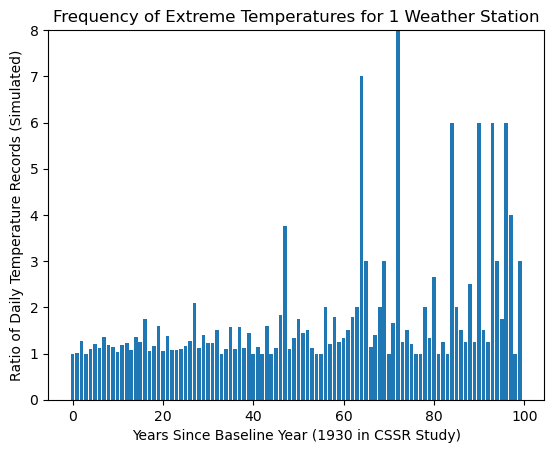

In [20]:
run_experiment_with_seed(1, num_stations=1, warming_per_year=0.001)

Adding it to a single plot makes it look good, but let's see how this looks across all stations.

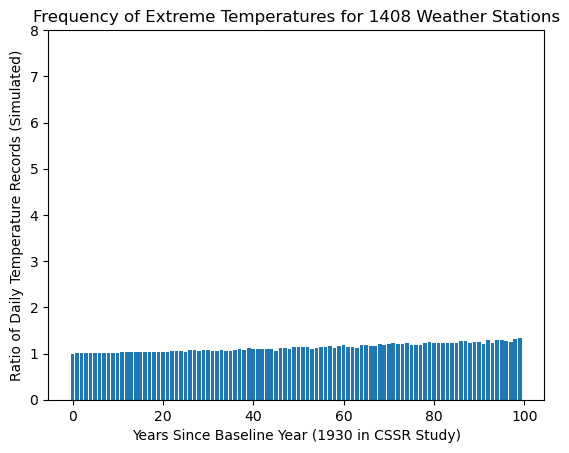

In [21]:
run_experiment_with_seed(1, num_stations=1408, warming_per_year=0.001)

I could also add in some short term weather trends, but I can't imagine how to make it look like the CSSR with so many weather stations. I'm sure if I decrease the number, it will start to look better.

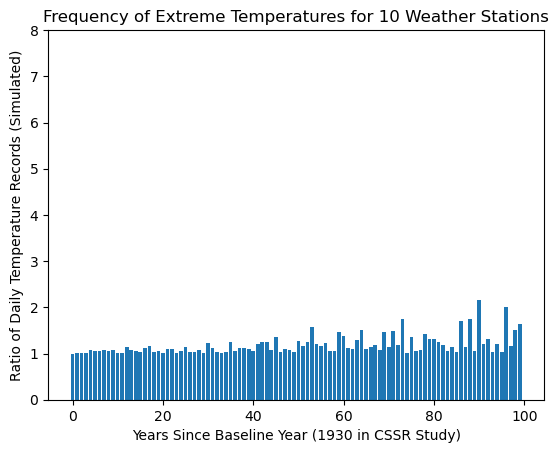

In [24]:
run_experiment_with_seed(1, num_stations=10, warming_per_year=0.001)

That does look a lot more like their figure, although it only included 10 weather stations.